## Final Project Submission

Please fill out:
* Student name: Celine Chege
* Student pace: full time
* Scheduled project review date/time: Friday 22/03/2024 4pm
* Instructor name: Diana Mongina
* Blog post URL:


## Exploratory Data Analysis for Microsoft's New Movie Studio

### 1. Understanding the Business
#### a) Introduction
##### The entertainment industry is dynamic and ever-evolving, with the movie sector being a prominent player. As technology continues to advance, tech giants like Microsoft, are exploring opportunities in movie production. With a vision to establish its presence in the film industry, Microsoft aims to use data-driven insights to enter the film industry effectively.
#### b)Business problem
##### Microsoft aims to enter the movie industry by establishing its own movie studio. However, lacking expertise in movie production, they need insights into the types of films that perform well at the box office. The objective is to explore existing movie data to identify trends and patterns that can inform Microsoft's decisions on the types of films to produce.
#### c)Key guidelines
##### >What are the characteristics of successful movies in terms of genres, budgets, and ratings?
##### >How do various factors such as release date, runtime, and production budget influence a movie's box office performance?
#### d)Sources of data
##### 1.Box office mojo 
##### 2.IMDB
##### 3.Rotten tomatoes
##### 4.TheMOvieDB
##### 5.The Numbers
#### Methods:
##### -Data Exploration and Cleaning: Explore the datasets, handle missing values, duplicates, and inconsistencies.
##### -Data Analysis: Perform exploratory data analysis using pandas for data manipulation and analysis.
##### -Visualization: Create visualizations (e.g., bar charts, scatter plots) to highlight trends and patterns in the data.
##### -Business Recommendations: Formulate actionable recommendations based on the insights derived from the data analysis.

### 2. Importing the libraries needed

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import sqlite3
import zipfile
import gzip

#importing data visualisation tools
import matplotlib.pyplot as plt 
import seaborn as sns



#### 2.1 Loading the bom_movies dataset

In [5]:
#opening the dataset

csv_file_path = './zippedData/bom.movie_gross.csv.gz'

with gzip.open(csv_file_path, 'rb') as f:
    bom_movie_gross_df = pd.read_csv(f)

print(bom_movie_gross_df.head(10))  
bom_movie_gross_df.tail(10)

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   
5                   The Twilight Saga: Eclipse   Sum.     300500000.0   
6                                   Iron Man 2   Par.     312400000.0   
7                                      Tangled     BV     200800000.0   
8                                Despicable Me   Uni.     251500000.0   
9                     How to Train Your Dragon   P/DW     217600000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
5     398000000  2010  
6     311500000  2010  
7   

,title,studio,domestic_gross,foreign_gross,year
3377,Let Yourself Go,Men.,12200.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3379,Souvenir,Strand,11400.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


### 2.2 Data exploration

In [6]:

#geting info about the data
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [7]:

#summary statistics
bom_movie_gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


### 2.3 Data cleaning

In [8]:

#checking for unique values in the bom data
bom_movie_gross_df.nunique()

title             3386
studio             257
domestic_gross    1797
foreign_gross     1204
year                 9
dtype: int64

In [9]:

#checking for null values
bom_movie_gross_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [11]:
#dropping null values
bom_movies = bom_movie_gross_df.dropna()

bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [12]:
#check dimensionality of  our dataframe.
bom_movies.shape

(2007, 5)

In [13]:
#checking for null values again
bom_movies.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [14]:
# Check for duplicate values in the column 'title'
bom_movies.title.duplicated().any()

False

### 2.3 Data Visualization

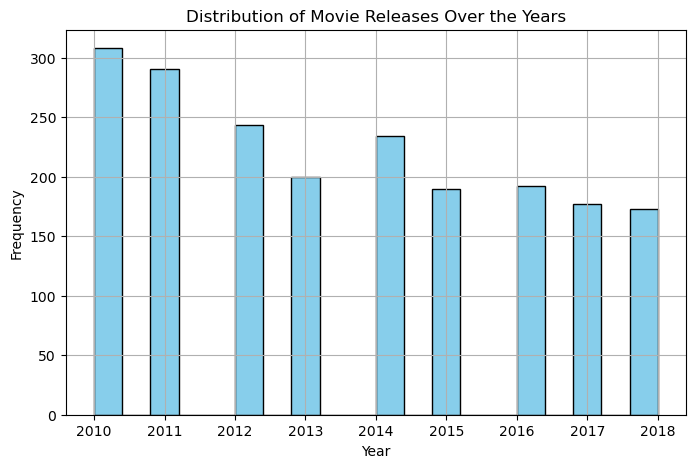

In [19]:
# Plot histogram for the 'year' column
plt.figure(figsize=(8, 5))
plt.hist(bom_movies['year'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Releases Over the Years')
plt.grid(True)
plt.show()


### 2.4 Findings
#### The relationship being analyzed in the histogram is the distribution of movie releases across different years. It helps to understand how the number of movie releases varies over time, providing insights into trends and patterns in the film industry.